In [5]:
#Let's get the stock prices for Tesla over the past year:
import yfinance as yf
import matplotlib.pyplot as plt
data = yf.Ticker('TSLA')
price = data.history(period='1y')



In order to calculate the daily returns, we will use the <span style="color:red">pct_change()</span> function, which calculates the percentage change between the current element and a prior one.

We will use it on the 'Close' column:

In [3]:
#pct_change() is a Pandas function and can be applied to DataFrames.
x = price['Close'].pct_change()
print(x)

Date
2020-12-24         NaN
2020-12-28    0.002901
2020-12-29    0.003465
2020-12-30    0.043229
2020-12-31    0.015674
                ...   
2021-12-17    0.006095
2021-12-20   -0.034989
2021-12-21    0.042881
2021-12-22    0.074947
2021-12-23    0.057619
Name: Close, Length: 252, dtype: float64


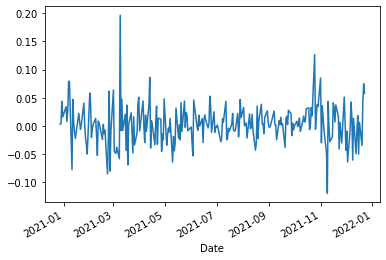

In [6]:
x = price['Close'].pct_change()
x.plot()
plt.savefig('plotpct.png')

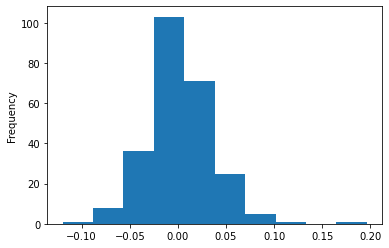

In [7]:
x = price['Close'].pct_change()

x.plot(kind='hist')

plt.savefig('plot.png')

### 1.1 Stock Returns


After understanding how the returns are distributed, we can calculate the returns from an investment.

For that, we need to calculate the cumulative returns, which can be done using the <span style="color:red"> cumprod()</span> function:

<span style="color:orange">The cumprod() function is used to get a cumulative product over an array of elements and return an array of the results.</span>

<AxesSubplot:xlabel='Date'>

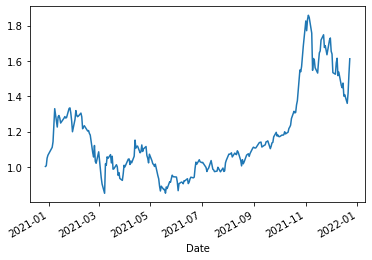

In [10]:
#The plot shows how a $1 investment would grow.
x = price['Close'].pct_change()

returns = (x + 1).cumprod()
returns.plot()

In [12]:
import numpy as np
x = np.array([2, 4, 2])
r = x.cumprod()
print(r)

[ 2  8 16]


## 1-2 Multiple Stocks


Let's take 3 different tickers and use the <span style="color:orange">pct_change() </span>function to calculate the daily returns:

The code belov gets the stock prices for the given stocks and applies to pct_change() function to the Close price.

In [13]:
import yfinance as yf

data = yf.download("AAPL MSFT TSLA", start='2021-01-01') 
x = data['Close'].pct_change()

print(x) 

[*********************100%***********************]  3 of 3 completed
                AAPL      MSFT      TSLA
Date                                    
2020-12-31       NaN       NaN       NaN
2021-01-04 -0.024719 -0.021266  0.034152
2021-01-05  0.012364  0.000965  0.007317
2021-01-06 -0.033662 -0.025929  0.028390
2021-01-07  0.034123  0.028457  0.079447
...              ...       ...       ...
2021-12-17 -0.006502 -0.003386  0.006095
2021-12-20 -0.008122 -0.012014 -0.034989
2021-12-21  0.019087  0.023069  0.042881
2021-12-22  0.015319  0.018057  0.074947
2021-12-23  0.003644  0.004472  0.057619

[248 rows x 3 columns]


To better understand the return values, we can use the describe() function on the DataFrame to get the descriptive statistics:


 <span style="color:orange">Descriptive statistics include the mean, standard deviation, min, max values, as well as the 25/50/75th% percentiles </span>

In [14]:
import yfinance as yf

data = yf.download("AAPL MSFT TSLA", start='2021-01-01') 

x = data['Close'].pct_change()

print(x.describe()) 

[*********************100%***********************]  3 of 3 completed
             AAPL        MSFT        TSLA
count  247.000000  247.000000  247.000000
mean     0.001277    0.001744    0.002270
std      0.015898    0.013294    0.034778
min     -0.041674   -0.036204   -0.119903
25%     -0.007731   -0.005438   -0.016334
50%      0.001485    0.000785    0.001953
75%      0.012455    0.010378    0.019257
max      0.053851    0.042114    0.196412


[*********************100%***********************]  3 of 3 completed


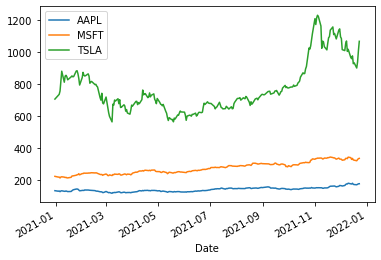

In [15]:
#Here is a chart comparing the daily prices of the stocks:
import yfinance as yf
import matplotlib.pyplot as plt

data = yf.download("AAPL MSFT TSLA", start='2021-01-01') 

data['Close'].plot()

plt.savefig('dailyCompareplot.png') 

[*********************100%***********************]  3 of 3 completed


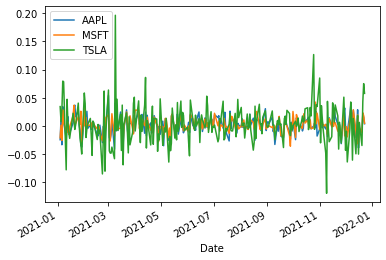

In [16]:
#We can also plot their daily returns:
import yfinance as yf
import matplotlib.pyplot as plt

data = yf.download("AAPL MSFT TSLA", start='2021-01-01') 

x = data['Close'].pct_change()
x.plot()

plt.savefig('compareDplot.png')

[*********************100%***********************]  3 of 3 completed


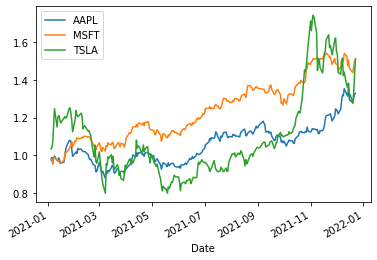

In [17]:
#Here are the cumulative returns for the given stocks:

import yfinance as yf
import matplotlib.pyplot as plt

data = yf.download("AAPL MSFT TSLA", start='2021-01-01') 

x = data['Close'].pct_change()
(x + 1).cumprod().plot()

plt.savefig('cumulativeplot.png')


## 1-3 Stock Correlations


In finance, correlation is a statistic that measures the degree to which two securities move in relation to each other.

We can easily calculate the correlations between stocks in Python, with the  <span style="color:orange">corr()</span> function.

In [18]:
import yfinance as yf

data = yf.download("FB AMZN AAPL NFLX GOOG", start='2020-01-01') 
x = data['Close'].pct_change()
corr = x.corr()
print(corr) 

[*********************100%***********************]  5 of 5 completed
          AAPL      AMZN        FB      GOOG      NFLX
AAPL  1.000000  0.672562  0.697634  0.698618  0.515939
AMZN  0.672562  1.000000  0.635662  0.653954  0.610913
FB    0.697634  0.635662  1.000000  0.737843  0.525361
GOOG  0.698618  0.653954  0.737843  1.000000  0.505322
NFLX  0.515939  0.610913  0.525361  0.505322  1.000000


[*********************100%***********************]  5 of 5 completed


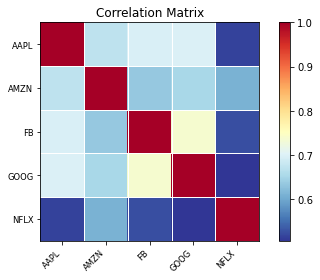

In [20]:
#Let's draw a nice graphic using the statmodels package:
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = yf.download("FB AMZN AAPL NFLX GOOG", start='2020-01-01') 
x = data['Close'].pct_change()
corr = x.corr()

sm.graphics.plot_corr(corr, xnames=list(x.columns))

plt.savefig('corr_plot.png')

The corr() function results in a matrix that includes values for each stock pair.
The values are in the range of $-1 to 1.$

A positive correlation means that the stocks have returns that are positively correlated and move in the same direction.
+1 means that the returns are perfectly correlated.

A correlation of 0 shows no relationship between the pair.
A negative correlation shows that the returns move in different directions.

## 1-4 Analyzing a Portfolio


In this lesson we will take a hypothetical portfolio of stocks and analyze it by calculating some important metrics.

First, let's define our portfolio. As an example, let's create our portfolio as 30% Apple, 20% Amazon, 40% Microsoft and 10% Tesla.
We will define the stock tickers and the portfolio weights using arrays:

In [21]:
stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']
weights = [0.3, 0.2, 0.4, 0.1] 

In [22]:
#Now, when we have the arrays defined, we can get the stock prices and calculate the portfolio returns:
import yfinance as yf
import numpy as np

stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']
weights = [0.3, 0.2, 0.4, 0.1]

data = yf.download(stocks, start='2021-01-01')

#daily returns
x = data['Close'].pct_change()

#portfolio return
ret = (x * weights).sum(axis = 1)

#total cumulative returns for our portfolio
cumulative = (ret + 1).cumprod() 

print(cumulative)


[*********************100%***********************]  4 of 4 completed
Date
2020-12-31    1.000000
2021-01-04    0.983176
2021-01-05    0.989889
2021-01-06    0.967507
2021-01-07    0.997577
                ...   
2021-12-17    1.321899
2021-12-20    1.303132
2021-12-21    1.333413
2021-12-22    1.360136
2021-12-23    1.371943
Length: 248, dtype: float64


<AxesSubplot:xlabel='Date'>

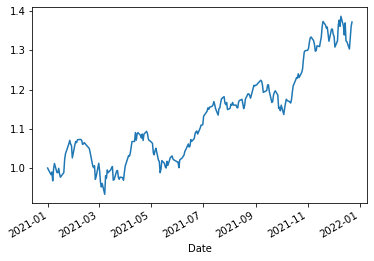

In [23]:
#To get the daily portfolio returns, we multiplied the daily returns by the weights and calculated the sum of the results.

#Plotting the cumulative returns will give us a better understanding of the data:

cumulative.plot()

Next, we will calculate the <span style="color:red">volatility</span> of our portfolio.
Volatility is also often used to measure risk. If a stock is very volatile, you can expect large changes in its price and therefore a higher risk.
Volatility is calculated using the standard deviation of the portfolio return.

We can calculate the daily volatility by simply using the NumPy std function on our daily returns:

In [24]:
import yfinance as yf
import numpy as np

stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']
weights = [0.3, 0.2, 0.4, 0.1]

data = yf.download(stocks, start='2021-01-01')

#daily returns
x = data['Close'].pct_change()

#portfolio return
ret = (x * weights).sum(axis = 1)

print(np.std(ret))

[*********************100%***********************]  4 of 4 completed
0.013355434141797306


In [27]:
#We can also calculate the annual volatility by taking the square of the number of 
#trading days in a year (252) and multiply it by the daily volatility:


import yfinance as yf
import numpy as np

stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']
weights = [0.3, 0.2, 0.4, 0.1]

data = yf.download(stocks, start='2021-01-01')

#daily returns
x = data['Close'].pct_change()

#portfolio return
ret = (x * weights).sum(axis = 1)

annual_std = np.std(ret) * np.sqrt(252)
print("This will return the risk % of our portfolio:->",annual_std)

[*********************100%***********************]  4 of 4 completed
This will return the risk % of our portfolio:-> 0.21201094434298212


##### Sharpe ratio
Another important metric is the <span style="color:red">Sharpe ratio</span>.

Sharpe ratio is the measure of the risk-adjusted return of a portfolio. A portfolio with a higher Sharpe ratio is considered better.

To calculate the Sharpe ratio, we need to take the average return and divide it by the volatility.

In [29]:
#We multiplied the result by the square root of 252 to annualize the Sharpe ratio. 
#(There are 252 trading days in a year)

import yfinance as yf
import numpy as np

stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']
weights = [0.3, 0.2, 0.4, 0.1]

data = yf.download(stocks, start='2021-01-01')

#daily returns
x = data['Close'].pct_change()

#portfolio return
ret = (x * weights).sum(axis = 1)

annual_std = np.std(ret) * np.sqrt(252)

sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252)

print(sharpe)
#Sharpe ratios greater than 1 are considered optimal

[*********************100%***********************]  4 of 4 completed
1.622590614819615


###  1-5 Portfolio Optimization


We learned how to calculate the main metrics to analyze and evaluate a portfolio of stocks.

Now we can use the power of Python to optimize a portfolio!

<span style="color:red">
Portfolio optimization is the technique of allocating assets so that it has the maximum return and minimum risk.
This can be done by finding the allocation that results in the maximum Sharpe ratio.
</span>


<span style="color:orange">
This process of randomly guessing is known as a Monte Carlo Simulation.
</span>
    
The simplest way to find the best allocation is to check many random allocations and find the one that has the best Sharpe ratio.

In [30]:
#To get started, let's define the initial stocks, download their price data, and calculate the daily returns.

#We need to store the weights, returns and Sharpe ratios for each portfolio we will be checking so that we can then find the one that is best.

import yfinance as yf
import numpy as np
import pandas as pd

stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']

data = yf.download(stocks, start='2018-01-01')

#daily returns
data = data['Close']
x = data.pct_change()

print(x)

[*********************100%***********************]  4 of 4 completed
                AAPL      AMZN      MSFT      TSLA
Date                                              
2018-01-02       NaN       NaN       NaN       NaN
2018-01-03 -0.000174  0.012775  0.004654 -0.010233
2018-01-04  0.004645  0.004476  0.008801 -0.008290
2018-01-05  0.011385  0.016163  0.012398  0.006230
2018-01-08 -0.003714  0.014425  0.001020  0.062638
...              ...       ...       ...       ...
2021-12-17 -0.006502  0.006789 -0.003386  0.006095
2021-12-20 -0.008122 -0.017284 -0.012014 -0.034989
2021-12-21  0.019087  0.019979  0.023069  0.042881
2021-12-22  0.015319  0.003638  0.018057  0.074947
2021-12-23  0.003644  0.000184  0.004472  0.057619

[1003 rows x 4 columns]


We are going to randomly assign a weight to each stock in our portfolio, and then calculate the metrics for that portfolio, including the Sharpe ratio.

To generate random weights, we will use the NumPy random function:



In [31]:
import numpy as np

wts = np.random.uniform(size = 4)
wts = wts/np.sum(wts) 

print(wts)

[0.30934576 0.30914255 0.27480978 0.1067019 ]


We divide the resulting weights by their sum to normalize them, so that the sum of the random weights is always 1.

Running the code above will generate random weights that sum up to 1.

## ---- IMP--##
Now we need to run a for loop, generate the random weights and calculate the returns, volatility and Sharpe ratio of the portfolio.
We already learned how to calculate these metrics, so here comes the code:

In [33]:
count = 500
for k in range(0, count):
    wts = np.random.uniform(size = len(x.columns))
    wts = wts/np.sum(wts)
    p_weights.append(wts)

   #returns
    mean_ret = (x.mean() * wts).sum()*252
    p_returns.append(mean_ret)

   #volatility
    ret = (x * wts).sum(axis = 1)
    annual_std = np.std(ret) * np.sqrt(252)
    p_risk.append(annual_std)
    
   #Sharpe ratio
    sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252)
    p_sharpe.append(sharpe)

NameError: name 'p_weights' is not defined

The for loop runs 500 times. During each iteration we calculate the metrics and store them in the corresponding lists using the append() function.
We used 500 to optimize the time to run the code in our Playground. In other scenarios, you could generate thousands of portfolios, to get a better result.

We now have the metrics for 500 portfolios!
Let's find the index of the portfolio with the maximum Sharpe ratio using the Numpy argmax() function and output the max Sharpe ratio and the weights:

In [34]:
import yfinance as yf
import numpy as np
import pandas as pd

stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']

data = yf.download(stocks, start='2018-01-01')

#daily returns
data = data['Close']
x = data.pct_change()

p_weights = []
p_returns = []
p_risk = []
p_sharpe = []

count = 500
for k in range(0, count):
    wts = np.random.uniform(size = len(x.columns))
    wts = wts/np.sum(wts)
    p_weights.append(wts)

    #returns
    mean_ret = (x.mean() * wts).sum()*252
    p_returns.append(mean_ret)

    #volatility
    ret = (x * wts).sum(axis = 1)
    annual_std = np.std(ret) * np.sqrt(252)
    p_risk.append(annual_std)
    
    #Sharpe ratio
    sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252)
    p_sharpe.append(sharpe)


max_ind = np.argmax(p_sharpe)

#Max Sharpe ratio
print(p_sharpe[max_ind])

#weights
print(p_weights[max_ind])

[*********************100%***********************]  4 of 4 completed
1.620871649274753
[0.22774059 0.02664932 0.40807403 0.33753606]


This portfolio results in the maximum Sharpe ratio.

Let's draw a bar chart visualizing the weights:

[*********************100%***********************]  4 of 4 completed


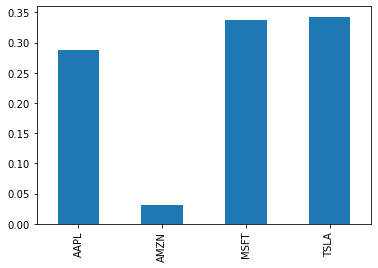

In [35]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']

data = yf.download(stocks, start='2018-01-01')

#daily returns
data = data['Close']
x = data.pct_change()

p_weights = []
p_returns = []
p_risk = []
p_sharpe = []

count = 500
for k in range(0, count):
    wts = np.random.uniform(size = len(x.columns))
    wts = wts/np.sum(wts)
    p_weights.append(wts)

    #returns
    mean_ret = (x.mean() * wts).sum()*252
    p_returns.append(mean_ret)

    #volatility
    ret = (x * wts).sum(axis = 1)
    annual_std = np.std(ret) * np.sqrt(252)
    p_risk.append(annual_std)
    
    #Sharpe ratio
    sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252)
    p_sharpe.append(sharpe)


max_ind = np.argmax(p_sharpe)

s = pd.Series(p_weights[max_ind], index=x.columns)
s.plot(kind='bar')

plt.savefig('plot.png')


## 
We found the best portfolio weights!
As a last step, let's plot all the 500 portfolios.
The chart is called Efficient Frontier and shows the returns on the Y-axis and volatility on the X-axis.

We can create the chart using the scatter() function, providing the volatility and return lists as parameters:

[*********************100%***********************]  4 of 4 completed


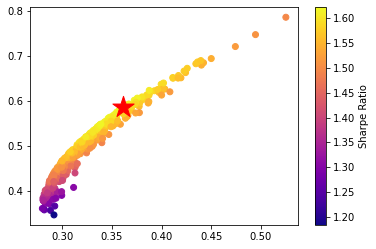

<Figure size 432x288 with 0 Axes>

In [37]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']

data = yf.download(stocks, start='2018-01-01')

#daily returns
data = data['Close']
x = data.pct_change()

p_weights = []
p_returns = []
p_risk = []
p_sharpe = []

count = 500
for k in range(0, count):
    wts = np.random.uniform(size = len(x.columns))
    wts = wts/np.sum(wts)
    p_weights.append(wts)

    #returns
    mean_ret = (x.mean() * wts).sum()*252
    p_returns.append(mean_ret)

    #volatility
    ret = (x * wts).sum(axis = 1)
    annual_std = np.std(ret) * np.sqrt(252)
    p_risk.append(annual_std)
    
    #Sharpe ratio
    sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252)
    p_sharpe.append(sharpe)


max_ind = np.argmax(p_sharpe)

plt.scatter(p_risk, p_returns, c=p_sharpe, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')

plt.scatter(p_risk[max_ind], p_returns[max_ind], color='r', marker='*', s=500)
plt.show()

plt.savefig('starplot.png')

We used additional parameters to make the chart prettier and add a color bar for the Sharpe ratio.

We have also added a red star marker to the chart, <span style="color:red"> showing the most efficient portfolio with the best Sharpe ratio.</span>

<span style="color:red">
The Efficient Frontier chart shows the return we can get for the given volatility, or, the volatility that we get for a certain return.
 </span>

# Questions-



q3-During portfolio optimization, the chart showing all generated portfolios with their return vs volatility is called:

--> Efficient Frontier

q-1 -->Which of the following calculates the volatility of a stock that has daily returns stored in the variable 'ret'?

--# np.std(ret)

#q-2 --> A higher Sharpe ratio shows a: -->better investment


